I set up my program by loading in the ggplot2 , reading in the Titanic training dataset, and fixing the varible types that were loaded incorrectly

In [11]:
library(ggplot2)
titanic=read.csv("train.csv")

titanic$Survived=factor(titanic$Survived)
titanic$Pclass=factor(titanic$Pclass)
titanic$PassengerId=factor(titanic$PassengerId)

Checking for missing data, and replacing the missing ages with the mean of the column and removing the rows that have a missing Cabin or Embarked value

In [12]:
summary(titanic)

titanic[is.na(titanic$Age),]$Age=mean(titanic$Age, na.rm=TRUE)
titanic[titanic$Embarked=="",]$Embarked=NA
titanic[titanic$Cabin=="",]$Cabin=NA
titanic<-na.exclude(titanic)

  PassengerId  Survived Pclass                                     Name    
 1      :  1   0:549    1:216   Abbing, Mr. Anthony                  :  1  
 2      :  1   1:342    2:184   Abbott, Mr. Rossmore Edward          :  1  
 3      :  1            3:491   Abbott, Mrs. Stanton (Rosa Hunt)     :  1  
 4      :  1                    Abelson, Mr. Samuel                  :  1  
 5      :  1                    Abelson, Mrs. Samuel (Hannah Wizosky):  1  
 6      :  1                    Adahl, Mr. Mauritz Nils Martin       :  1  
 (Other):885                    (Other)                              :885  
     Sex           Age            SibSp           Parch             Ticket   
 female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000   1601    :  7  
 male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000   347082  :  7  
              Median :28.00   Median :0.000   Median :0.0000   CA. 2343:  7  
              Mean   :29.70   Mean   :0.523   Mean   :0.3816   3101295 :  6  
  

Removing unnecessary columns

In [13]:
titanic$Name=NULL
titanic$PassengerId=NULL
titanic$Ticket=NULL
titanic$Cabin=NULL

Calculating the mean age

In [4]:
mean(titanic$Age)

[1] 35.11239

Calculating the mean age of the female passengers

In [5]:
mean(titanic[titanic$Sex=="female",]$Age)

[1] 32.45678

Calculating the median fare of passengers in Class 1

In [6]:
median(titanic[titanic$Pclass=="1",]$Fare)

[1] 66.6

Calculating the median fare of female passengers not in Class 1

In [7]:
median(titanic[titanic$Sex=="female"&titanic$Pclass!="1",]$Fare)

[1] 12.7375

Calculating the median age of survived female passengers in Class 1 or 2

In [8]:
median(titanic[titanic$Survived=="1"&titanic$Sex=="female"&titanic$Pclass!="3",]$Age)

[1] 32

Calculating the mean fare of survived teenage female passengers

In [9]:
mean(titanic[titanic$Survived=="1"&titanic$Sex=="female"&titanic$Age>12&titanic$Age<20,]$Fare)

[1] 107.5407

Calculating the mean fare of survived teenage female passengers for each class separately

In [14]:
mean(titanic[titanic$Survived=="1"&titanic$Sex=="female"&titanic$Age>12&titanic$Age<20&titanic$Pclass=="1",]$Fare)

mean(titanic[titanic$Survived=="1"&titanic$Sex=="female"&titanic$Age>12&titanic$Age<20&titanic$Pclass=="2",]$Fare)

mean(titanic[titanic$Survived=="1"&titanic$Sex=="female"&titanic$Age>12&titanic$Age<20&titanic$Pclass=="3",]$Fare)

[1] 107.5407

[1] NaN

[1] NaN

Calculating the ratio of Survived:Not Survived passengers that paid more than the average fare

In [15]:
surv=titanic[titanic$Survived=="1"&titanic$Fare>mean(titanic$Fare),]
notsurv=titanic[titanic$Survived=="0"&titanic$Fare>mean(titanic$Fare),]
nrow(surv)/nrow(notsurv)

[1] 3

Adding a column to standardize the fare

In [16]:
titanic$sfare=(titanic$Fare-mean(titanic$Fare))/sd(titanic$Fare)

Bar graph of Sex and Survived for passengers that are younger than the average age

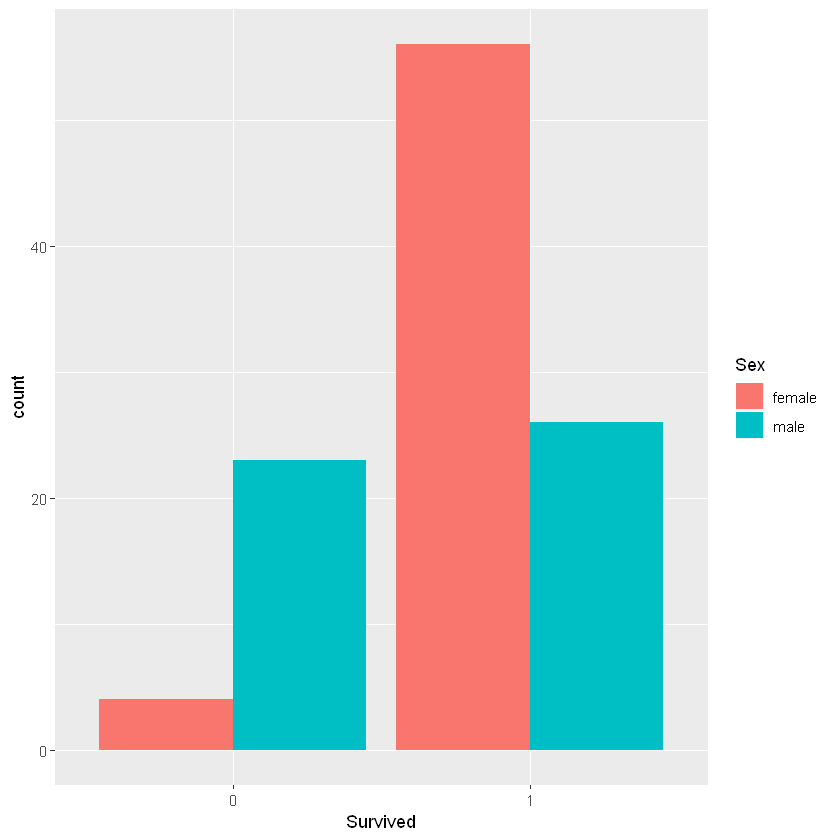

In [17]:
young=titanic[titanic$Age<mean(titanic$Age),]
ggplot(data=young)+geom_bar(mapping=aes(x=Survived, fill=Sex),position="dodge")

Density plot of age for those who survived and paid above the average fare

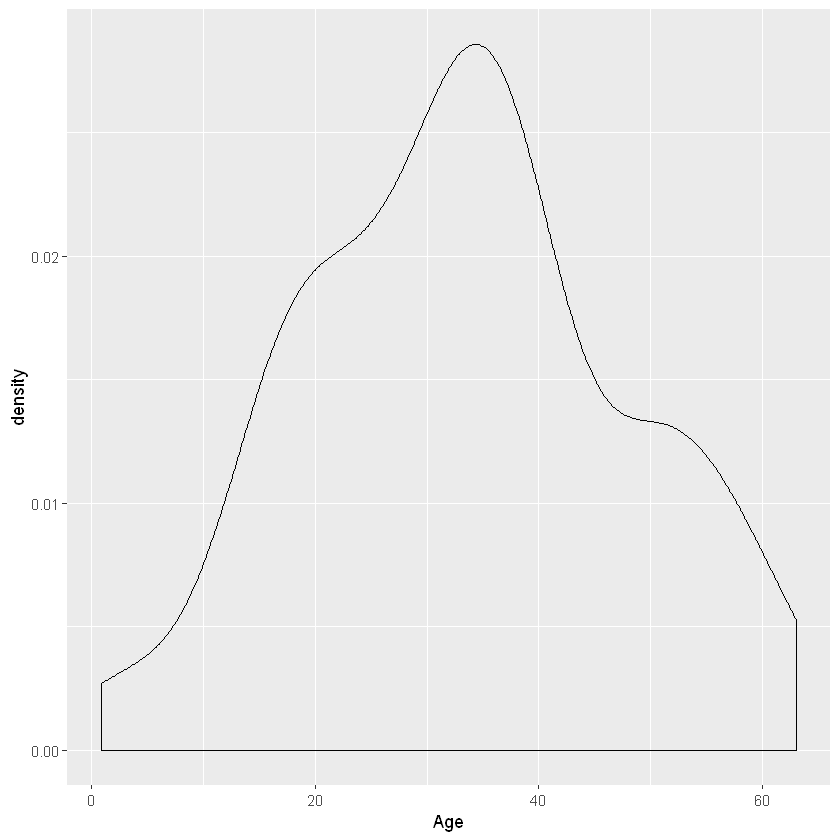

In [18]:
pass=titanic[titanic$Survived=="1"&titanic$Fare>mean(titanic$Fare),]
ggplot(data=pass)+geom_density(mapping=aes(x=Age))

Density plot of age for passengers that embarked in Southampton and Queenstown

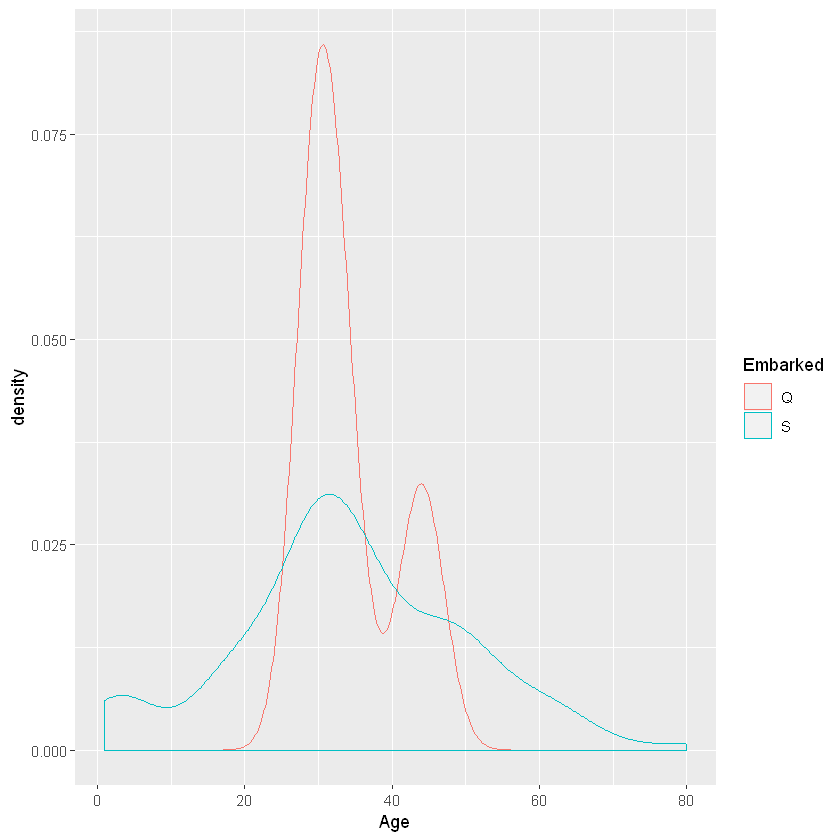

In [19]:
location=titanic[titanic$Embarked=="Q"|titanic$Embarked=="S",]
ggplot(data=location)+geom_density(mapping=aes(x=Age,color=Embarked))

Adding a new cfare categorical variable

In [20]:
titanic$cfare=ifelse(titanic$Fare<mean(titanic$Fare),"cheap","expensive")

Adding a new cage categorical variable

In [21]:
titanic$cage="NA"
titanic[titanic$Age>=0&titanic$Age<11,]$cage="0"
titanic[titanic$Age>=11&titanic$Age<21,]$cage="1"
titanic[titanic$Age>=21&titanic$Age<31,]$cage="2"
titanic[titanic$Age>=31&titanic$Age<41,]$cage="3"
titanic[titanic$Age>=41&titanic$Age<51,]$cage="4"
titanic[titanic$Age>=51&titanic$Age<61,]$cage="5"
titanic[titanic$Age>=61&titanic$Age<71,]$cage="6"
titanic[titanic$Age>=71&titanic$Age<81,]$cage="7"

Bar graph of cage and Survived for passengers who paid more than the average fare

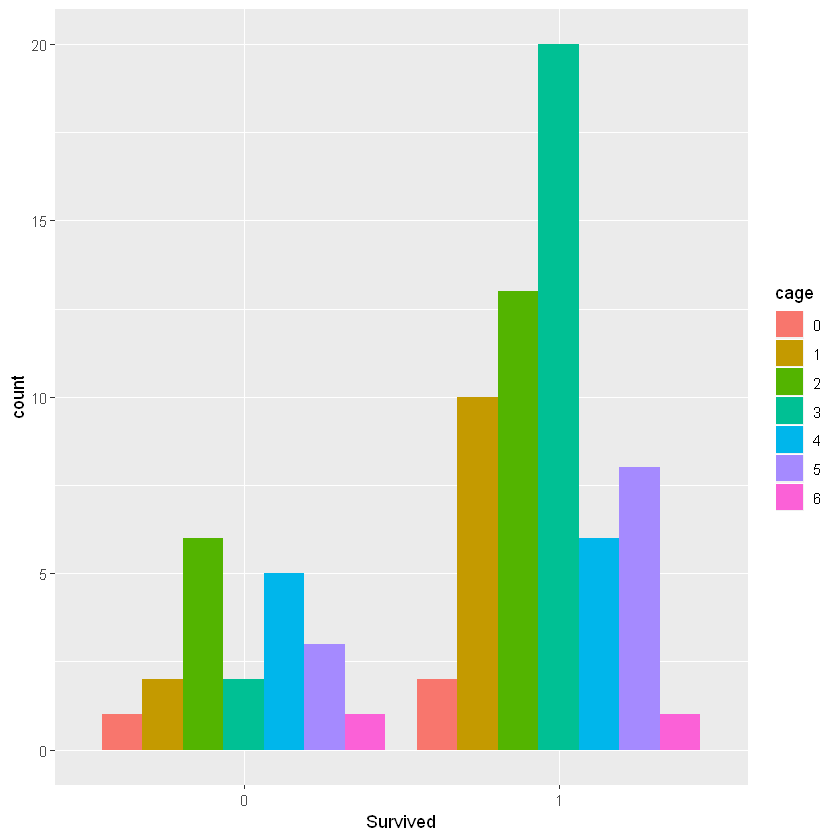

In [22]:
paymore=titanic[titanic$Fare>mean(titanic$Fare),]
ggplot(data=paymore)+geom_bar(mapping=aes(x=Survived,fill=cage),position="dodge")

Bar graph of cage and Survived for passengers who paid more than the average fare, split by Pclass

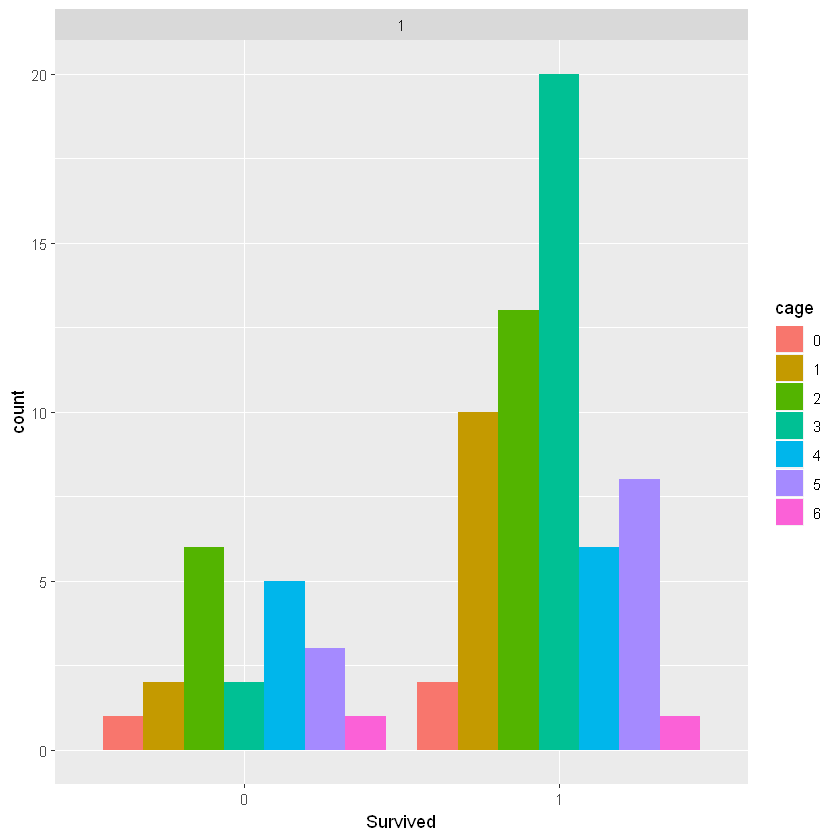

In [23]:
ggplot(data=paymore)+geom_bar(mapping=aes(x=Survived,fill=cage),position="dodge")+ 
  facet_wrap(~ Pclass, nrow = 2)